In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
path = "E:/Research/Ovarian Cancer/Articles/Orginal/"
save_path = "E:/Research/Ovarian Cancer/Articles/Orginal/figures/"
data = pd.read_excel(path+"data_ready.xlsx", sheet_name='Sheet2')

In [3]:
data

,Age,Grading,Histology,Type,Status,MonthSurvive,YearSurvive
0,59.660274,1.0,Endometrioid carcinoma,type_1,1,1,1
1,NaN,2.0,Serous carcinoma,type_2,1,1,1
2,33.000000,2.0,Undifferentiated,type_2,1,1,1
3,33.000000,2.0,Undifferentiated,type_2,1,1,1
4,64.591781,2.0,Serous carcinoma,type_2,1,1,1
...,...,...,...,...,...,...,...
2670,44.000000,9.0,Serous carcinoma,type_2,0,120,10
2671,46.000000,9.0,Germ cell,Germ cell,0,120,10
2672,48.000000,9.0,Non-specific,Non-specific,0,120,10
2673,53.000000,9.0,Serous carcinoma,type_2,0,120,10


In [4]:
# rename columns
data = data.rename(columns={ 'Grading':'Grade', 'Histology':'Histopathology', 'Type':'Histogroup', 'MonthSurvive':'Month', 'YearSurvive':'Year'})


replacement_patho = {
    'Serous carcinoma': 'SC',
    'Non-specific' : 'NSC',
    'Undifferentiated': 'UC', 
    'Mucinous carcinoma': 'MC', 
    'Germ cell': 'GCC', 
    'Endometrioid carcinoma': 'EC',
    'Sex cord-stromal': 'SCSC', 
    'Clear cell carcinoma': 'CCC', 
    'Transitional cell': 'TCC',
    'Mixed epithelial-stromal carcinoma': 'MESC',
    'Other specific non-epithelial':'ONEC',
    'Squamous carcinoma':'SCC'
}

"""
Four levels of similarity; also called a four-grade system. The four-grade system describes the tumor as
Grade I; also called well-differentiated
Grade II; also called moderately differentiated
Grade III; also called poorly differentiated
Grade IV; also called undifferentiated or anaplastic
"""

replacement_grade = {
    1: 'Grade I',
    2: 'Grade II',
    3: 'Grade III',
    4: 'Grade IV',
    9: 'Unknown',
}


replacement_histogroup = {
    'type_2': 'EOC II',
    'Non-specific' : 'NSC',
    'type_1': 'EOC I', 
    'Germ cell': 'GCC', 
    'Sex cord-stromal': 'SCSC', 
    'Other specific non-epithelial': 'ONEC',
}



data['Histopathology'] = data['Histopathology'].replace(replacement_patho, regex=True)

data['Grade'] = data['Grade'].replace(replacement_grade, regex=True)

data['HPG'] = data['Histogroup'].replace(replacement_histogroup, regex=True)

data['Status'] = data['Status'].astype('bool')


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2675 entries, 0 to 2674
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2656 non-null   float64
 1   Grade           2660 non-null   object 
 2   Histopathology  2675 non-null   object 
 3   Histogroup      2675 non-null   object 
 4   Status          2675 non-null   bool   
 5   Month           2675 non-null   int64  
 6   Year            2675 non-null   int64  
 7   HPG             2675 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 149.0+ KB


In [6]:
data.isna().sum()

Age               19
Grade             15
Histopathology     0
Histogroup         0
Status             0
Month              0
Year               0
HPG                0
dtype: int64

In [7]:
data.Age = data.Age.fillna(data.Age.median())
data.Grade = data.Grade.fillna(data.Grade.mode()[0])


50.627988221738605


<Axes: xlabel='Age', ylabel='Count'>

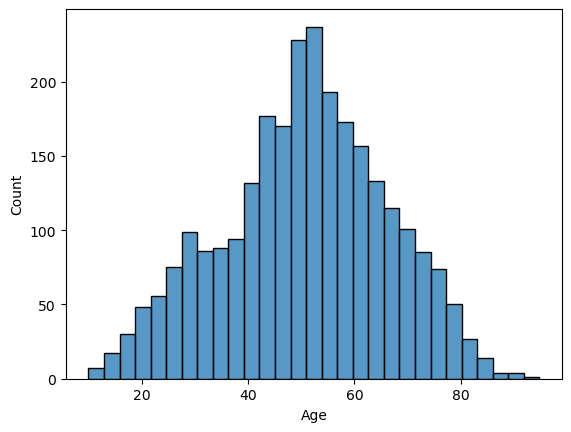

In [8]:
# Age
print(data.Age.mean())

sns.histplot(x='Age', data=data)

In [9]:
# grading

data.Grade.value_counts()

Unknown      1826
Grade III     294
Grade II      264
Grade I       258
Grade IV       33
Name: Grade, dtype: int64

In [10]:
# Histology

data.Histopathology.value_counts()

SC      1021
NSC      474
UC       430
MC       205
GCC      190
EC       154
SCSC      63
CCC       56
TCC       30
MESC      19
ONEC      18
SCC       15
Name: Histopathology, dtype: int64

In [11]:
# Histopathology grouping

data.HPG.value_counts()


EOC II    1470
NSC        474
EOC I      460
GCC        190
SCSC        63
ONEC        18
Name: HPG, dtype: int64

In [12]:
# Status

data.Status.value_counts()

True     1387
False    1288
Name: Status, dtype: int64

<Axes: xlabel='Month', ylabel='Count'>

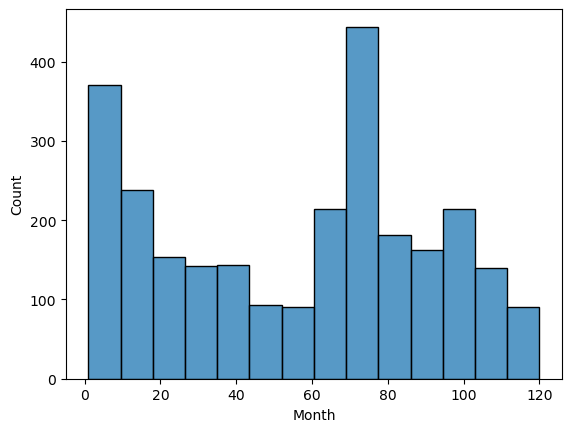

In [13]:
# Month

#data.Month.hist()

sns.histplot(data=data, x='Month')

In [14]:
data.Year.value_counts()

1     474
6     427
7     383
9     259
2     249
8     245
3     217
4     166
10    132
5     123
Name: Year, dtype: int64

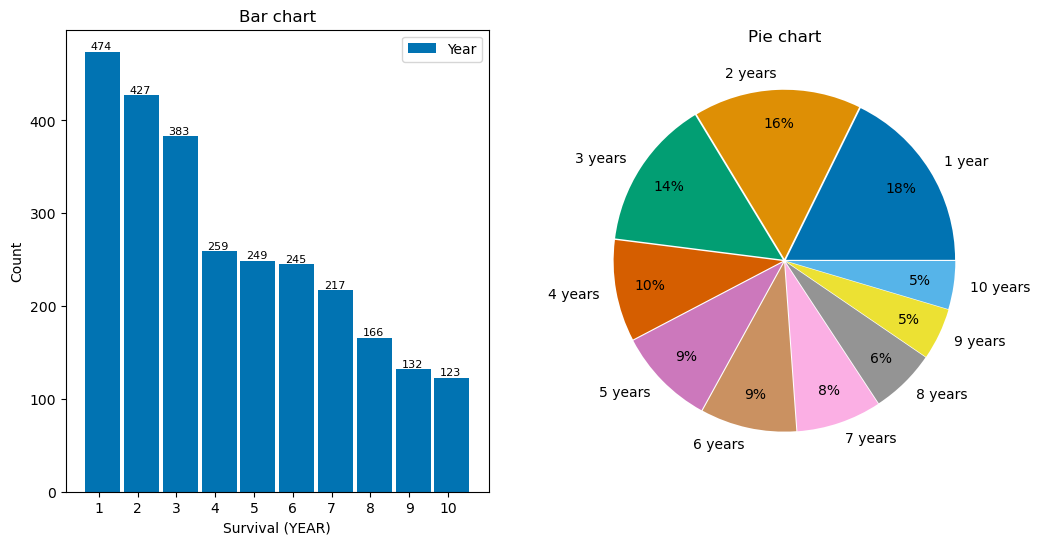

In [19]:
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
#plt.subplots(figsize=(600*px, 550*px))

sns.set_palette(sns.color_palette("colorblind", 10))

# create subplots with 1 row and 2 columns
fig, axs = plt.subplots(ncols=2, figsize=(1200*px, 600*px))

# plot countplot on the first subplot


# Create bars
barWidth = 0.9

# Create a list in a range of 1-10
My_list = [*range(1, 11, 1)]

axs[0].bar(My_list, data.Year.value_counts(), width=barWidth, label='Year')

# set x and y labels to bar plot
axs[0].set_xlabel("Survival (YEAR)")
axs[0].set_ylabel("Count")


# Text below each barplot with a rotation at 90°
axs[0].set_xticks([r + barWidth for r in range(len(My_list))], My_list)


# Create labels
data_list = data.Year.value_counts().to_list()


# Text on the top of each bar
for i in range(len(My_list)):
    axs[0].text(x = My_list[i]-0.3 , y = data_list[i]+2, s = data_list[i], size = 8)
    
# Create legend
axs[0].legend()
    
# define data and labels for pie chart
explode = [0.01, 0.011, 0.012, 0.011, 0.012, 0.011, 0.012, 0.011, 0.012, 0.01]
labels = ['1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10 years']

# plot pie chart on the second subplot
axs[1].pie(data.Year.value_counts(), labels=labels, explode=explode, autopct='%.0f%%', pctdistance=0.8)


axs[0].set_title('Bar chart')
axs[1].set_title('Pie chart')

# set the title at the top and center of the figure
#fig.suptitle('Overall survival distribution based on Year', fontsize=12, x=0.5, y=1)

#plt.show()

#plt.savefig(save_path+'Overall survival distribution of patients by year.jpg', dpi=300)

0.5436606194475067


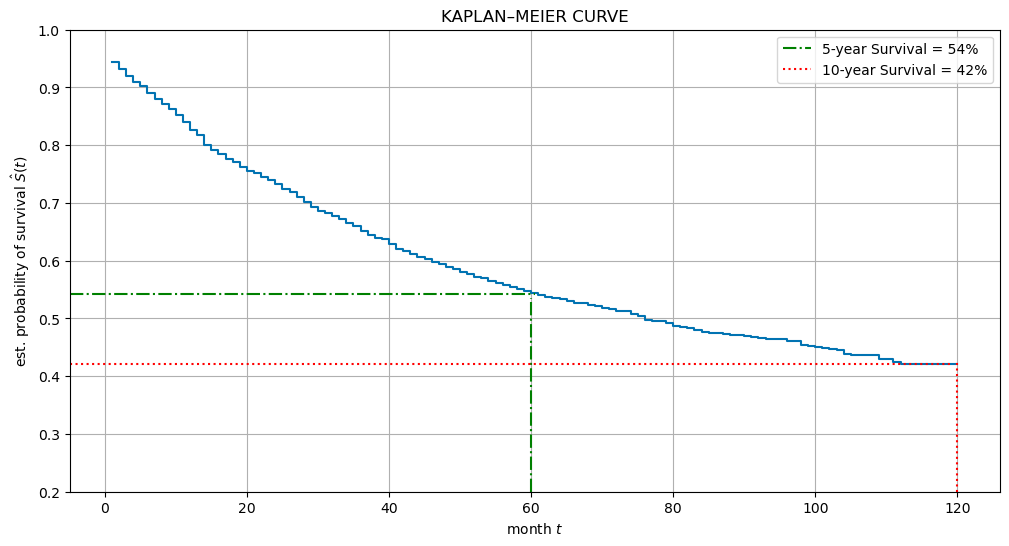

In [26]:
px = 1/plt.rcParams['figure.dpi']  # pixel in inches

from sksurv.nonparametric import kaplan_meier_estimator

plt.subplots(figsize=(1200*px, 600*px))

time, survival_prob = kaplan_meier_estimator(data["Status"], data["Month"])
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("month $t$")

plt.axhline(y=0.543, xmax= 0.5, color='green', linestyle='dashdot', label='5-year Survival = 54%')
plt.axvline(x=60, ymax=0.42, color='green', linestyle='dashdot' )

plt.axhline(y=0.421, xmax= 0.95, color='red', linestyle='dotted', label='10-year Survival = 42%')
plt.axvline(x=120,  ymax=0.28, color='red', linestyle='dotted')

plt.grid()
plt.legend()
plt.ylim([0.2,1.0])
plt.title("KAPLAN–MEIER CURVE")

# Set the time point of interest
time_point = 60  # in months

# Find the index of the time point in the timeline
time_index = next(i for i, t in enumerate(time) if t >= time_point)

# Calculate the survival rate at the time point
survival_rate = survival_prob[time_index]

print(survival_rate)

#plt.savefig(save_path+'Overall survival Kaplan_meier_curve.jpg', dpi=300)

In [17]:
# Managing ONEC histopathology variable

data.loc[(data.Histopathology == 'ONEC') & (data.Month > 80), 'Status'] = False

In [18]:
# KEEP EOCI and EOCII in histogroup

EOC_data = data[(data.Histogroup == 'EOC I') | (data.Histogroup == 'EOC II')]

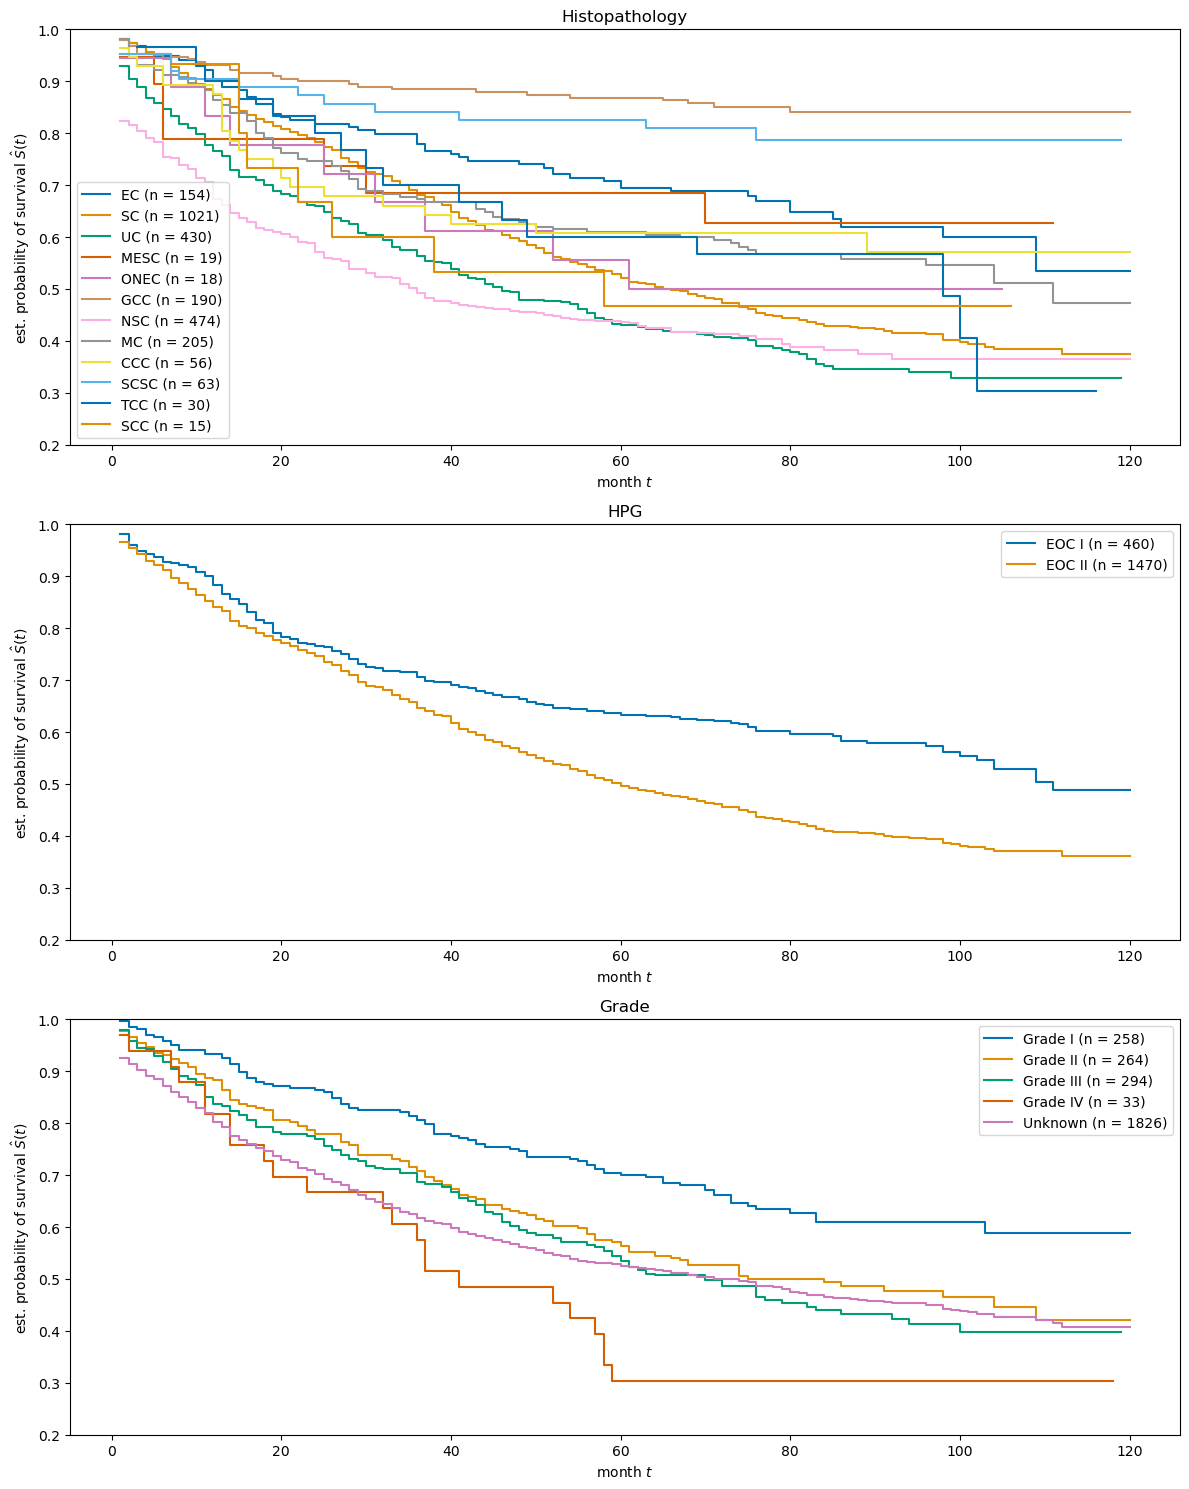

In [36]:
colors = sns.color_palette('colorblind', n_colors=len(data['Histopathology'].unique()))

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(1200*px, 1500*px))

for name, i, ax in zip(['Histopathology', 'HPG', 'Grade'], ['Histopathology', 'HPG', 'Grade'], axes):
    if name == 'HPG':
        for idx, value in enumerate(['EOC I', 'EOC II']):
            mask = data[i] == value
            time_cell, survival_prob_cell = kaplan_meier_estimator(data["Status"][mask],
                                                                   data["Month"][mask])
            sns.lineplot(x=time_cell, y=survival_prob_cell, drawstyle='steps-post',
                         label="%s (n = %d)" % (value, mask.sum()), ax=ax, color=colors[idx])

        ax.set_ylabel("est. probability of survival $\hat{S}(t)$")
        ax.set_xlabel("month $t$")
        ax.set_ylim([0.2,1.0])
        ax.set_title(name)
        ax.legend(loc='best')
    
    else:
        for idx, value in enumerate(data[i].unique()):
            mask = data[i] == value
            time_cell, survival_prob_cell = kaplan_meier_estimator(data["Status"][mask],
                                                                   data["Month"][mask])
            sns.lineplot(x=time_cell, y=survival_prob_cell, drawstyle='steps-post',
                         label="%s (n = %d)" % (value, mask.sum()), ax=ax, color=colors[idx])

        ax.set_ylabel("est. probability of survival $\hat{S}(t)$")
        ax.set_xlabel("month $t$")
        ax.set_ylim([0.2,1.0])
        ax.set_title(name)
        ax.legend(loc='best')
    
fig.tight_layout()

#plt.show()
#plt.savefig(save_path+'Overall survival distribution of Histopathology, Histogroup and Grade.jpg', dpi=300)

In [37]:
def dispersions_1(cont: list, cat: list, target: str):
    sns.set_palette(sns.color_palette('colorblind', 10))
    for co in cont:
        for ct in cat:
            l = (len(data["%s" % (ct)].unique()) - 2) * 2
            pp=sns.catplot(
                data=data, 
                x=ct, 
                y=co, 
                hue=target, 
                kind="box",
                aspect=2
            )
            
            title = "{} by {} and overall survival time ({})".format(co, ct, target)

            pp.fig.suptitle(
                title, 
                fontsize=12
            )
            plt.xticks(rotation=0, ha='right')
            #plt.savefig(save_path+'Overall survival '+ title +'.jpg', dpi=600)
            plt.show()


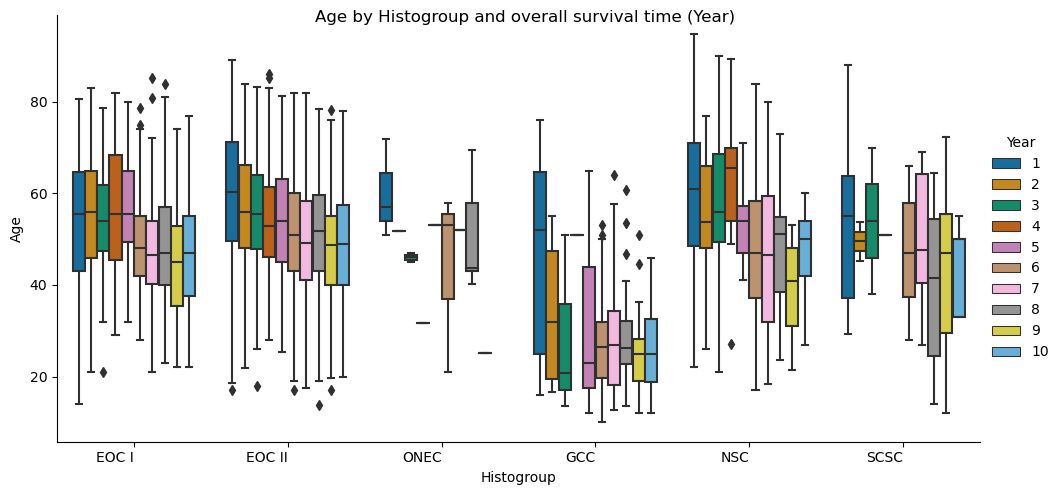

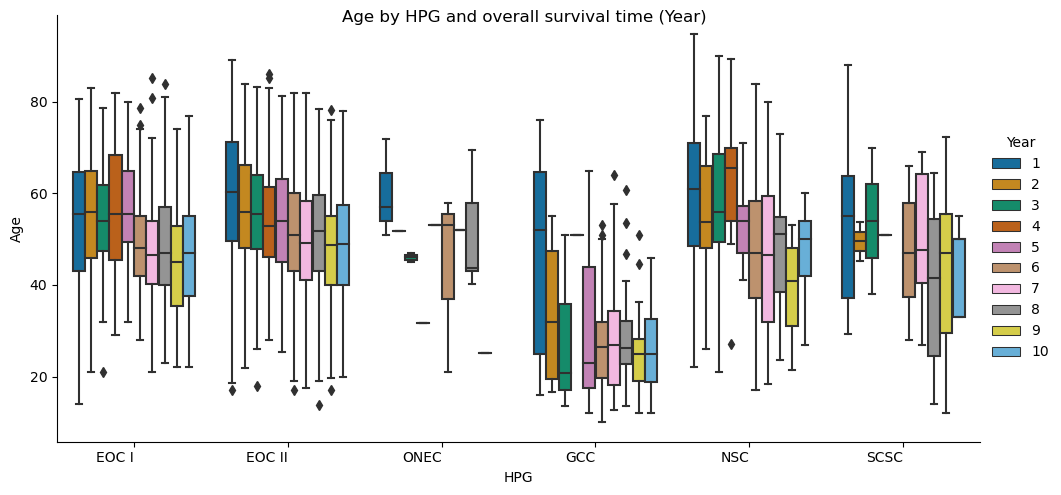

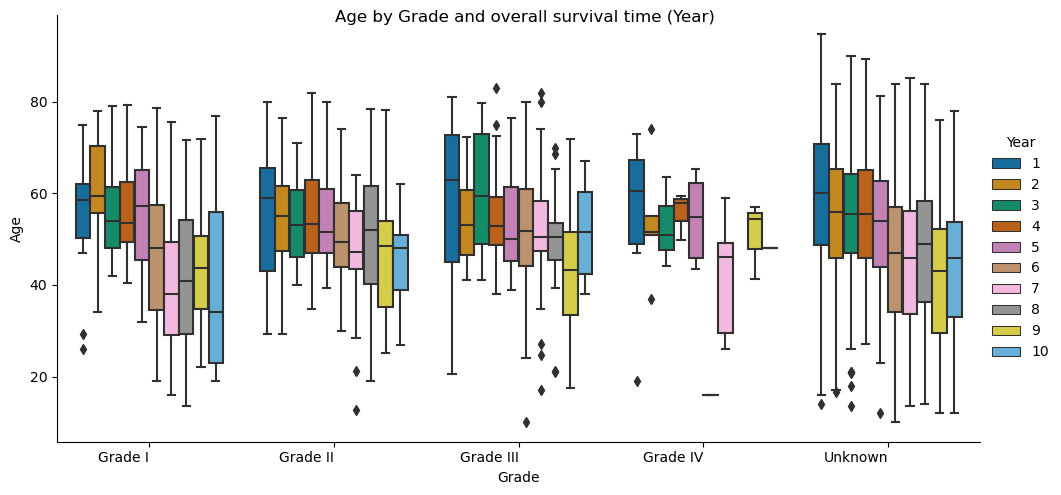

In [38]:
dispersions_1(data[['Age']], data[['Histogroup','HPG', 'Grade']], "Year")

In [48]:
def dispersions_2(cont: list, cat: list, target: str, px=0.01):
    
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(1200*px, 1500*px))
    
    i = 0
    for co in cont:
        for ct in cat:
            if ct == 'HPG':
                data_filtered = data.loc[data['HPG'].isin(['EOC I', 'EOC II'])]
                l = (len(data_filtered["%s" % (ct)].unique()) - 2) * 2
                ax = axes[i]

                sns.boxplot(
                    data=data_filtered, 
                    x=ct, 
                    y=co, 
                    hue=target,
                    palette="colorblind",
                    fliersize=0, 
                    ax=ax, 
                )

                ax.set_title("{} by {} and overall survival time ({})".format(co, ct, target), fontsize=12)
                ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)) # add this line to add legend
                i += 1
            else:
                l = (len(data["%s" % (ct)].unique()) - 2) * 2
                ax = axes[i]

                sns.boxplot(
                    data=data, 
                    x=ct, 
                    y=co, 
                    hue=target,
                    palette="colorblind",
                    fliersize=0, 
                    ax=ax, 
                )

                ax.set_title("{} by {} and overall survival time ({})".format(co, ct, target), fontsize=12)
                ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)) # add this line to add legend
                i += 1
            
           
    plt.tight_layout()
    #plt.savefig(save_path+'Overall survival Age vs his&grade.jpg', dpi=300)
    plt.show()


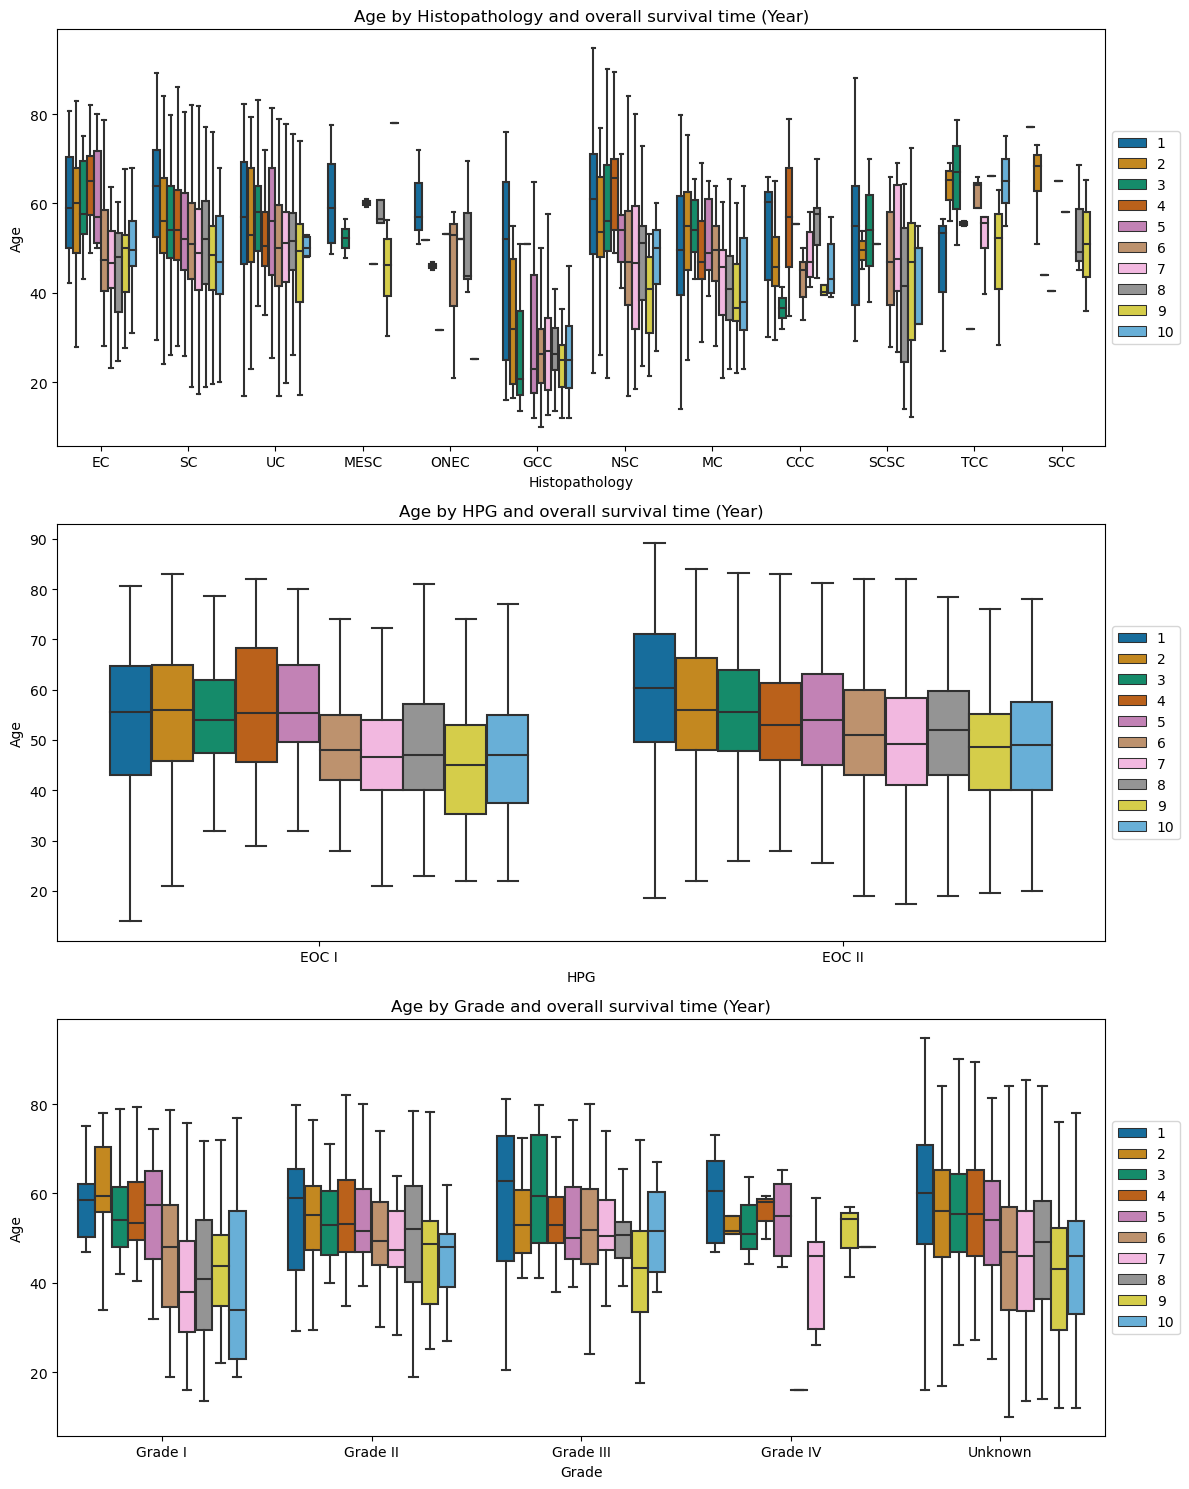

In [49]:
dispersions_2(data[['Age']], data[['Histopathology', 'HPG','Grade']], "Year")

In [13]:
var = ['Histogroup']

df_age = pd.DataFrame({
    #'Mean':data.groupby(var)['Age'].mean().round(decimals=2).sort_index(), 
    'Count':data.groupby(var)['Age'].count().astype('int').sort_index(), 
    'Per': (data.groupby(var)['Age'].count().sort_index() / data.groupby(var)['Age'].count().sum()).round(decimals=3) 
})


# Using apply() method to combine two columns of text
df_age['count_per'] = df_age[["Count", "Per"]].astype('str').apply(lambda x: (f'{x[0]} ({x[1]})'), axis=1)
df_age = df_age.drop(['Count', 'Per'], axis=1)
df_age


,count_per
Histogroup,
EOC I,460 (0.172)
EOC II,1470 (0.55)
GCC,190 (0.071)
NSC,474 (0.177)
ONEC,18 (0.007)
SCSC,63 (0.024)


In [19]:
data.groupby('Grade')['Age'].count().sort_index() / data.groupby('Grade')['Age'].count().sum()

Grade
Grade I      0.096449
Grade II     0.098692
Grade III    0.109907
Grade IV     0.012336
Unknown      0.682617
Name: Age, dtype: float64

In [20]:
data_year5 = data[data.Year < 6 ]

In [33]:
for name, i in zip(['Histogroup'], ['Histogroup']):
    for idx, value in enumerate(data[i].unique()):
        mask = data[i] == value
        time_cell, survival_prob_cell = kaplan_meier_estimator(data["Status"][mask],
                                                               data["Year"][mask])
        print(value)
        print(time_cell[3:10])
        print(survival_prob_cell[3:10])
        print("+++++++++++++++++")
        


EOC I
[ 4  5  6  7  8  9 10]
[0.66304348 0.6326087  0.62170165 0.59929799 0.5789137  0.54347
 0.50555349]
+++++++++++++++++
EOC II
[ 4  5  6  7  8  9 10]
[0.5609992  0.49616353 0.45930957 0.42088484 0.40889761 0.38963018
 0.382546  ]
+++++++++++++++++
ONEC
[4 5 6 7 8 9]
[0.61111111 0.55555556 0.5        0.5        0.41666667 0.        ]
+++++++++++++++++
GCC
[ 4  5  6  7  8  9 10]
[0.87894737 0.86842105 0.8525353  0.84543084 0.84543084 0.84543084
 0.84543084]
+++++++++++++++++
NSC
[ 4  5  6  7  8  9 10]
[0.4558037  0.43645355 0.41495337 0.39330363 0.38019351 0.38019351
 0.38019351]
+++++++++++++++++
SCSC
[ 4  6  7  8  9 10]
[0.82539683 0.80952381 0.78977933 0.78977933 0.78977933 0.78977933]
+++++++++++++++++
